# Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV

# Data Loading

In [2]:
df_cancer = pd.read_csv("./datasets/breast-cancer-datasets.csv")
df_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Terdapat 569 observasi dan 33 kolom pada dataset:
- `id`: ID number
- `diagnosis`: golongan kanker apakah Malignant (ganas) atau Benign (jinak)

Karakteristik dari inti sel:
- `radius` (jarak dari titik pusat ke titik perimeter)
- `texture` (standard deviation dari intensitas skala keabuan pada komponen-komponen piksel citra)
- `perimeter` (garis keliling inti sel)
- `area` (luas inti sel)
- `smoothness` (perbedaan antara panjang jari-jari dan rata-rata garis di sekitarnya)
- `compactness` (kepadatan inti sel -> perimeter^2 / area - 1.0)
- `concavity` (kecengkungan kurva pada batas inti sel)
- `concave points` (titik kecengkungan kurva pada batas inti sel)
- `symmetry` (selisih garis tegak lurus sumbu utama menuju batas inti sel di kedua arah)
- `fractal dimension` (ukuran numerik/dimensi fraktal dari sel -> "coastline approximation" - 1)

Pengukuran:
- `mean`: rata-rata
- `se`: standard error
- `worst`: terbesar

### check missing value

In [4]:
df_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Kita dapat menghapus kolom `id` karena tidak digunakan untuk memprediksi, dan kolom `Unnamed: 32` karena merupakan kolom yang kosong.

In [5]:
df_cancer.drop(['id', 'Unnamed: 32'], axis = 1, inplace=True)

In [6]:
print(df_cancer.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [7]:
df_cancer.isnull().sum().sum()

0

In [8]:
df_cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# Data Visualization

In [9]:
B, M = df_cancer['diagnosis'].value_counts()
print('Frekuensi stadium kanker : ')
print('Banyaknya kanker ganas (Malignant) : ', M)
print('Banyaknya kanker jinak (Benign)    : ', B)

Frekuensi stadium kanker : 
Banyaknya kanker ganas (Malignant) :  212
Banyaknya kanker jinak (Benign)    :  357


/home/salamah/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


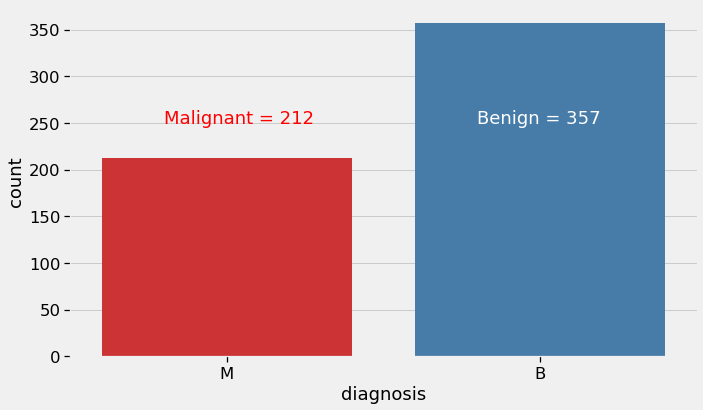

In [10]:
plt.figure(figsize=(10,6))
sns.set_context('notebook', font_scale=1.5)
sns.countplot('diagnosis',data=df_cancer, palette="Set1")
plt.annotate('Malignant = 212', xy=(-0.2, 250), xytext=(-0.2, 250), size=18, color='red')
plt.annotate('Benign = 357', xy=(0.8, 250), xytext=(0.8, 250), size=18, color='w');

In [11]:
y = df_cancer.diagnosis     # target= M or B 
features = df_cancer.drop(['diagnosis'], axis = 1, inplace = False)

In [12]:
# Standardization of features
stdX = (features - features.mean()) / (features.std())              
data_st = pd.concat([y,stdX.iloc[:,:]],axis=1)
data_st = pd.melt(data_st,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

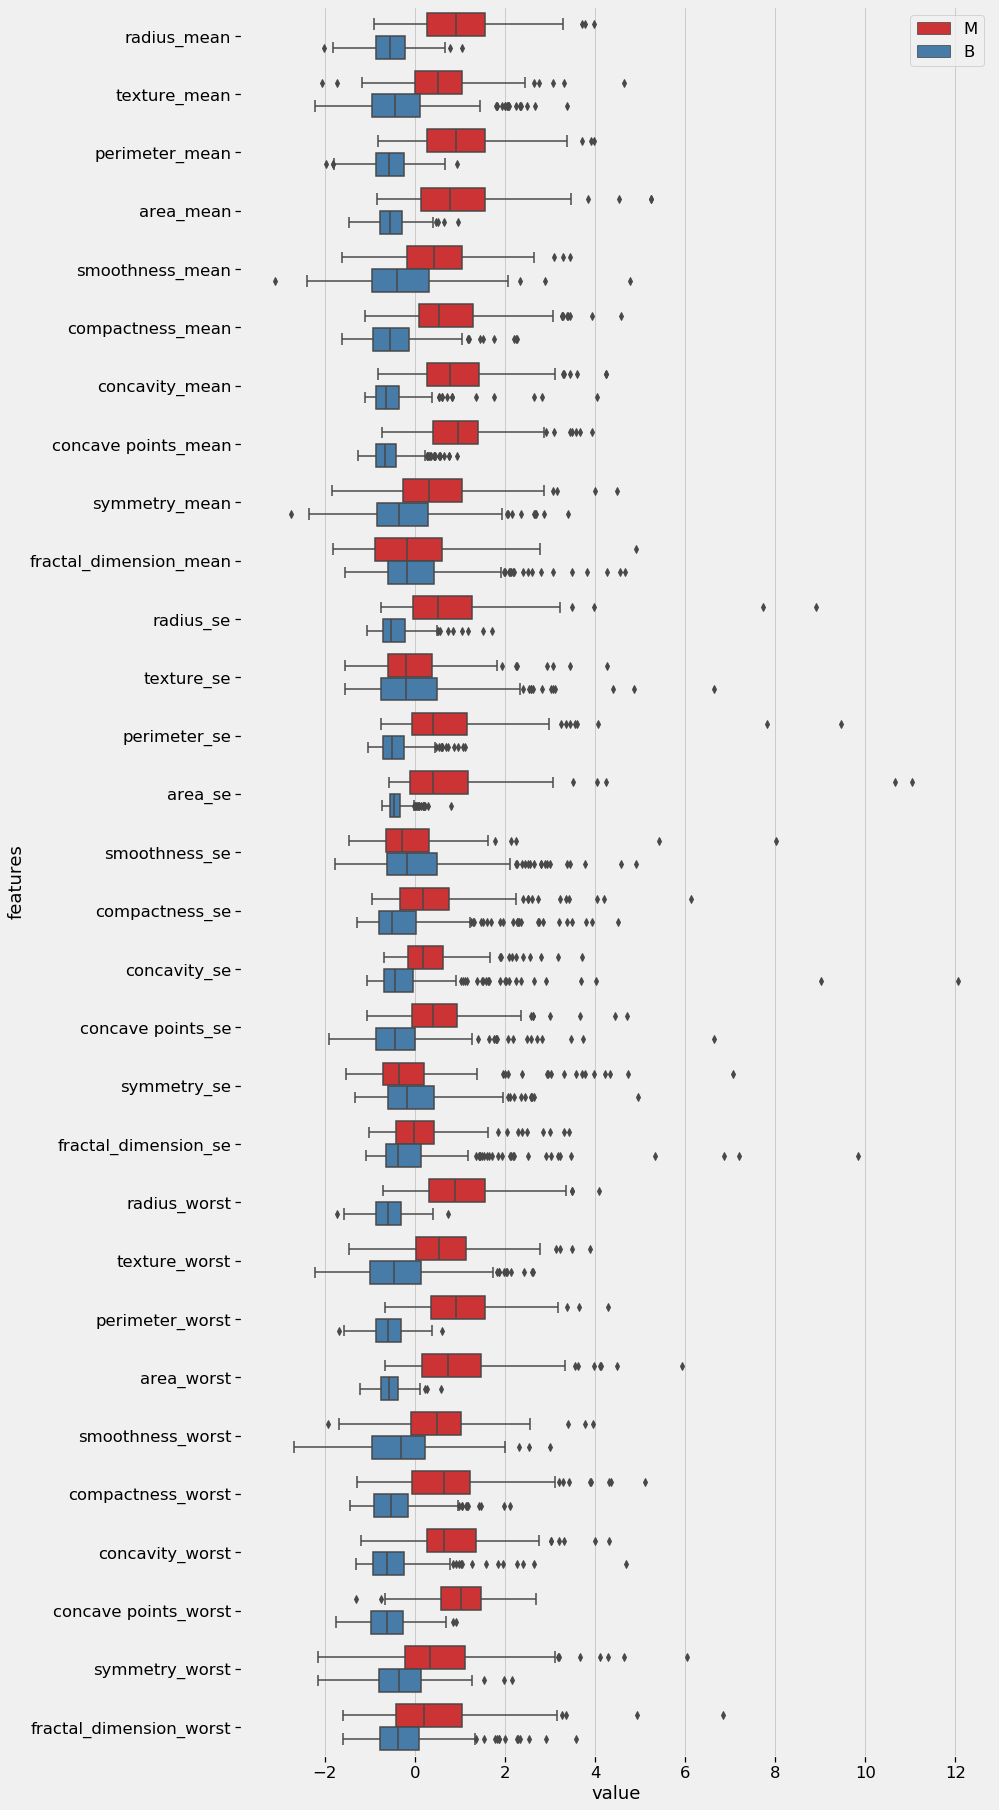

In [13]:
plt.figure(figsize=(12,30))
sns.set_context('notebook', font_scale=1.5)
sns.boxplot(x="value", y="features", hue="diagnosis", data=data_st, palette='Set1')
plt.legend(loc='best');

Dari plot ini dapat diidentifikasi bahwa beberapa fitur sangat mirip, seperti misalnya, `perimeter_mean` dan `area_mean`, serta `perimeter_se` dan `area_se`. Lebih lanjut, kita juga dapat mengamati bahwa beberapa fitur memiliki ukuran yang berbeda ketika tumornya ganas atau jinak. Contohnya adalah area_mean, radius_mean, dan concavity_mean. Di sisi lain, pada fitur-fitur seperti fractal_dimension_mean dan texture_se, distribusi tumor ganas dan jinak tampaknya serupa.

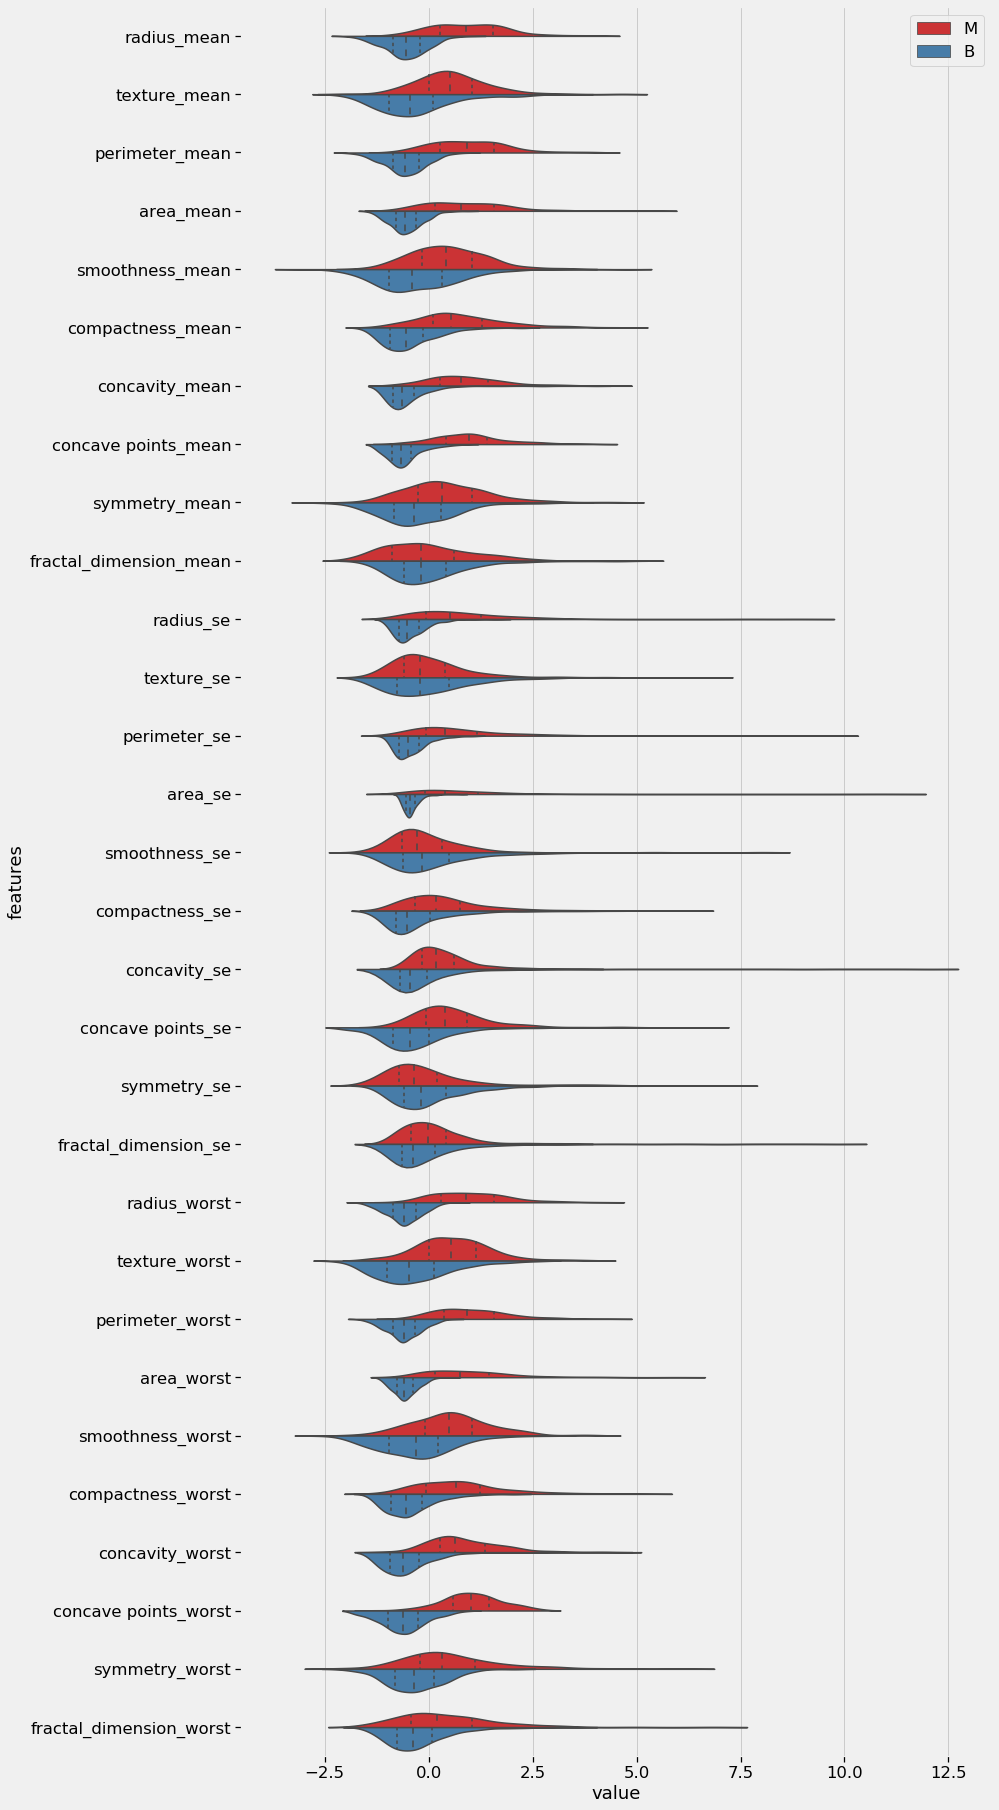

In [14]:
plt.figure(figsize=(12,30))
sns.set_context('notebook', font_scale=1.5)
sns.violinplot(x="value", y="features", hue="diagnosis", data=data_st,split=True, 
               inner="quart", palette='Set1')
plt.legend(loc='best');

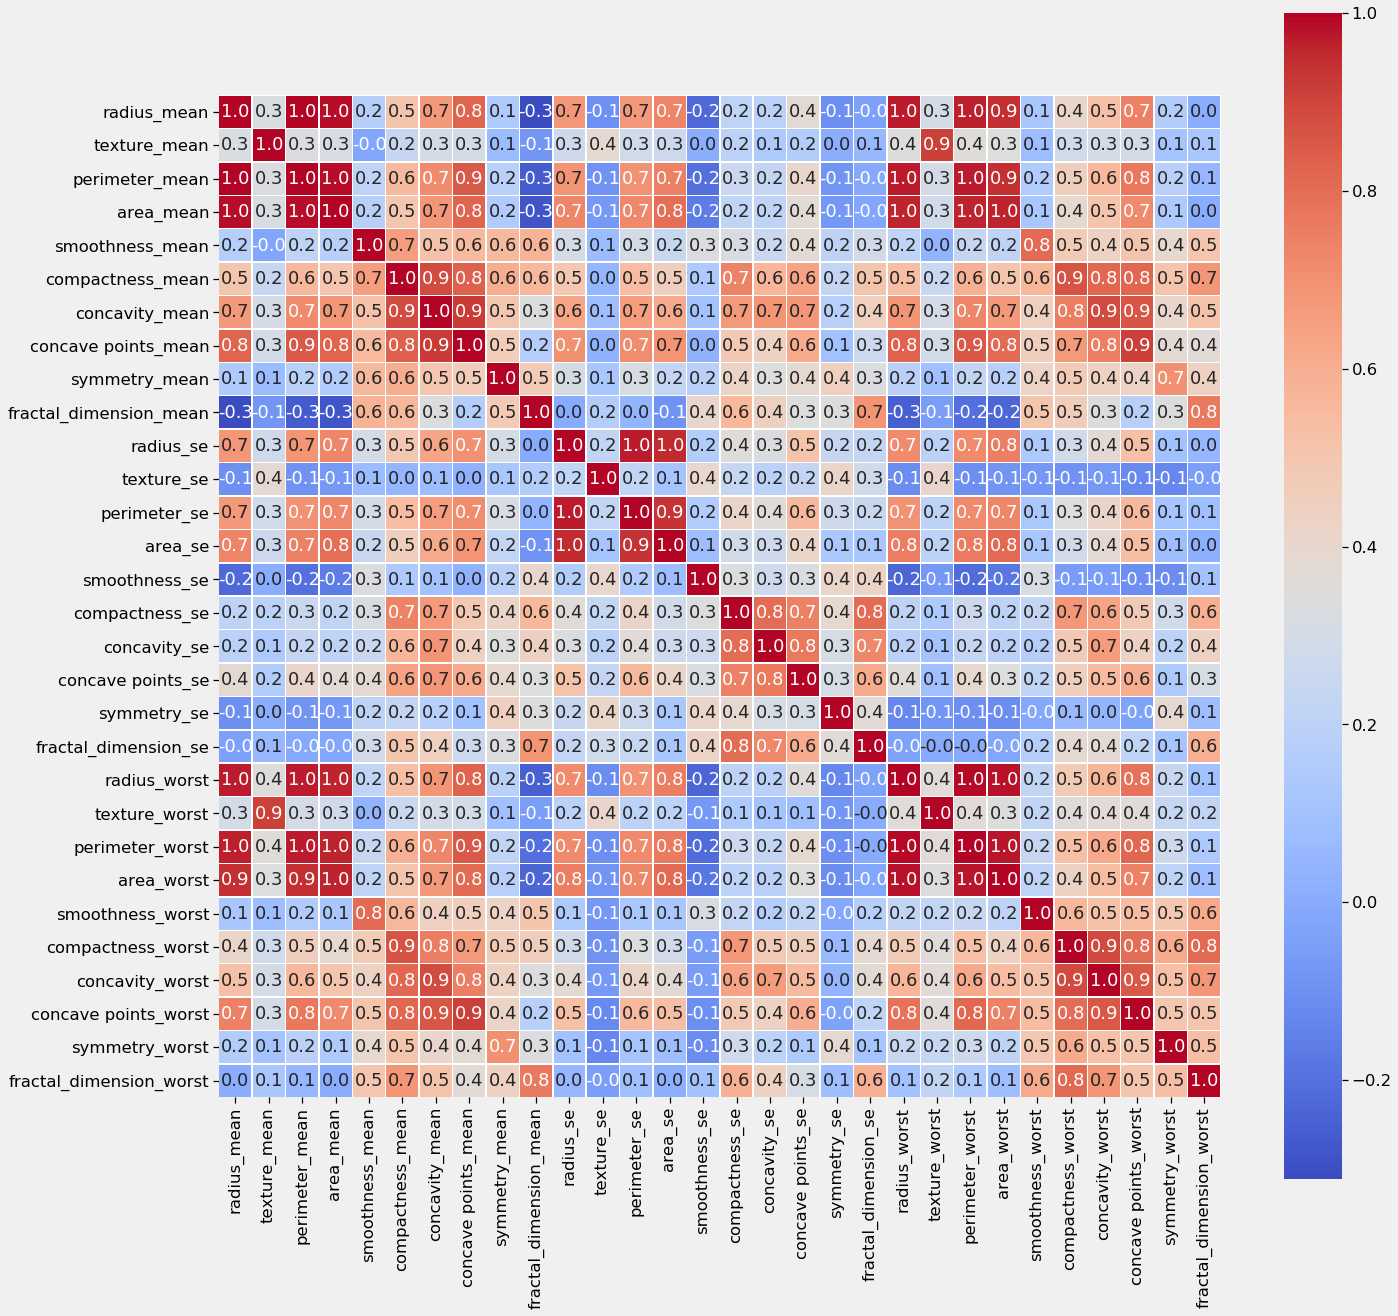

In [15]:
corr = df_cancer.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax);

In [16]:
def pearson_r(x, y):
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for 'radius_mean', 'symmetry_mean'
r1 = pearson_r(df_cancer['radius_mean'], df_cancer['perimeter_mean'])
r2= pearson_r(df_cancer['radius_mean'], df_cancer['symmetry_mean'])

name_c = []
for (i,j) in zip(range(1,31),range(1,31)):
        r = pearson_r(df_cancer.iloc[:,1], df_cancer.iloc[:,j])
        if abs(r) >= 0.80 and df_cancer.columns[j]  not in name_c:
                    name_c.append(df_cancer.columns[j]) 
print()
print('* Lenght of columns assuming r >=0.80:', len(name_c)) 
print('name_c =',name_c)


* Lenght of columns assuming r >=0.80: 7
name_c = ['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst']


In [17]:
name_c = []
for (i,j) in zip(range(1,31),range(1,31)):
        r = pearson_r(df_cancer.iloc[:,1], df_cancer.iloc[:,j])
        if abs(r) <= 0.40 and df_cancer.columns[j]  not in name_c:
                    name_c.append(df_cancer.columns[j])
                            
print('* Lenght of columns assuming r <=0.40:', len(name_c)) 
print('name_c =',name_c) 

* Lenght of columns assuming r <=0.40: 15
name_c = ['texture_mean', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'texture_worst', 'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst']


# Data Preprocessing

Mapping target variable `diagnosis` dengan LabelEncoder

In [18]:
data=df_cancer.copy()
data['diagnosis']=df_cancer['diagnosis'].map({'M':1,'B':0})

membagi data menjadi train 80% dan tes 20%
semua data tanpa menghilangkan yang berkorelasi

In [19]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, 
                                                    stratify=y)

In [20]:
print(f"Train features: {X_train.shape}")
print(f"Train target: {y_train.shape}")
print(f"Test features: {X_test.shape}")
print(f"Test target: {y_test.shape}")

Train features: (455, 30)
Train target: (455,)
Test features: (114, 30)
Test target: (114,)


# Data Modeling

Target class:
- Positive (1): Malignant
- Negative (0): Benign

Confusion Matrix :
![](ConfusionMatrix.png)

Misalkan 0 untuk Label Negatif dan 1 untuk Label Positif. Confusion Matrix punya empat istilah:
1. True Negative (TN): Model memprediksi data ada di kelas Negatif dan yang sebenarnya data memang ada di kelas Negatif.
2. True Postive (TP): Model memprediksi data ada di kelas Positif dan yang sebenarnya data memang ada di kelas Positif.
3. False Negative (FN): Model memprediksi data ada di kelas Negatif, namun yang sebenarnya data ada di kelas Positif.
4. False Positive (FP): Model memprediksi data ada di kelas Positif, namun yang sebenarnya data ada di kelas Negatif.

$Precision = \frac{TP}{TP+FP}$

$Recall = \frac{TP}{TP+FN}$

Evaluation metric:
- Recall: berapa persen pasien dengan Malignant yang dapat tertangkap oleh model?
- Precision: dari pasien yang diprediksi Malignant, berapa persen yang benar-benar Malignant?
- F1 score: perbandingan rata-rata Recall dan Precision yang dibobotkan. $F1 = 2 \times \frac{Recall \times Precision}{Recall+Precision}$

Types of error:
- False Positive (FP): Pasien yang sebenarnya mengidap kanker jinak (Benign), oleh model diprediksi sebagai Malignant. Hal ini dapat menimbulkan rasa panik pada pasien, namun pasien tersebut akan mendapatkan konsultasi atau treatment lanjutan sebagai tindakan preventif, sehingga keselamatan pasien lebih terjamin.
- False Negative (FN): Pasien yang sebenarnya mengidap kanker ganas (Malignant), oleh model diprediksi sebagai Benign. Hal ini dapat membahayakan keselamatan pasien karena kanker tidak ditangani dengan serius.

Ingin meminimalisir kasus False Negative (FN), sehingga diharapkan Recall yang tinggi. Precision juga diharapkan untuk tetap tinggi, namun bisa jadi prioritas kedua. Apabila kedua metric sama-sama ingin diprioritaskan, gunakan F1-score.

## Logistic Regression

Melakukan training model Logistic Regression

In [21]:
logreg = LogisticRegression(max_iter=np.inf)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=inf,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# Fit data
logreg.fit(X_train, y_train)
# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

Accuracy: 0.9473684210526315


              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



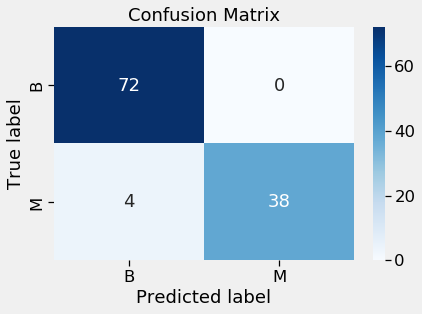

In [34]:
print(classification_report(y_test, y_pred))

ConfMatrix = confusion_matrix(y_test,y_pred)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['B', 'M'], yticklabels = ['B', 'M'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");
plt.savefig('logreg.png')

## Random Forest Classifier

Accuracy: 0.9649122807017544

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Average 5-Fold CV Score: 0.9596025461884802 , Standard deviation: 0.018026522009064877


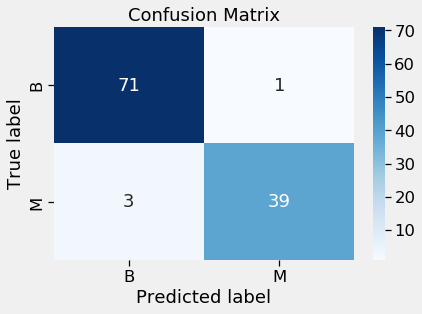

In [32]:
Ran = RandomForestClassifier(n_estimators=50)
Ran.fit(X_train, y_train)
y_pred = Ran.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(Ran, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)), 
      ", Standard deviation: {}".format(np.std(cv_scores)))

ConfMatrix = confusion_matrix(y_test,Ran.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['B', 'M'], yticklabels = ['B', 'M'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");
plt.savefig('rf.png')

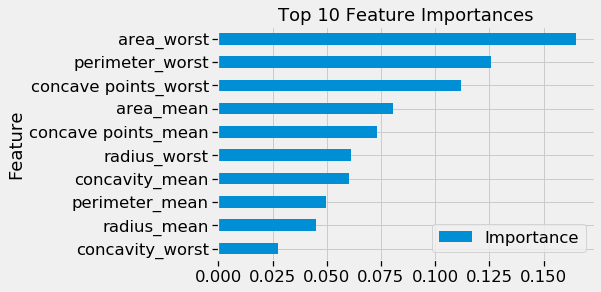

In [25]:
var_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': Ran.feature_importances_
}).set_index('Feature')

var_imp.sort_values('Importance', ascending=False).head(10).sort_values('Importance').plot.barh(title='Top 10 Feature Importances')
plt.show()

## Support Vector Classifier

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.01}
Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Best score is: 0.984634599744394


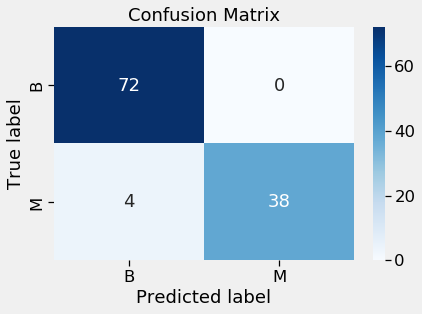

In [33]:
# To Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space: C is regularization strength while gamma controls the kernel coefficient. 
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train & test sets

# Instantiate the GridSearchCV object: cv
cv =GridSearchCV(pipeline,parameters, cv=3)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Tuned Model Parameters: {}".format(cv.best_params_))
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Best score is: {}".format(cv.best_score_))

ConfMatrix = confusion_matrix(y_test,cv.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['B', 'M'], yticklabels = ['B', 'M'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");
plt.savefig('svc.png')

In [27]:
pd.DataFrame(cv.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SVM__C,param_SVM__gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,0.007358,0.001264,0.002717,0.000628,10,0.01,"{'SVM__C': 10, 'SVM__gamma': 0.01}",0.986842,0.973684,0.993377,0.984635,0.008190,1
1,0.006966,0.002055,0.003012,0.000673,1,0.01,"{'SVM__C': 1, 'SVM__gamma': 0.01}",0.980263,0.973684,0.973510,0.975819,0.003143,2
0,0.009116,0.002543,0.003546,0.001009,1,0.1,"{'SVM__C': 1, 'SVM__gamma': 0.1}",0.973684,0.953947,0.947020,0.958217,0.011297,3
5,0.005725,0.000476,0.001645,0.000095,100,0.01,"{'SVM__C': 100, 'SVM__gamma': 0.01}",0.973684,0.953947,0.947020,0.958217,0.011297,3
2,0.008734,0.000995,0.003194,0.000414,10,0.1,"{'SVM__C': 10, 'SVM__gamma': 0.1}",0.973684,0.947368,0.947020,0.956024,0.012488,5


# Conclusion

Akurasi masing-masing model
<br>
**Logistic Regression**       : 0.94
<br>
**Random Forest Classifier**  : 0.96 
<br>
**Support Vector Classifier** : 0.96
<br>

Confusion Matrix masing-masing model :
**Logistic Regression**
![](logreg2.png)

Dengan menggunakan Logistic Regression didapatkan False Negative  (FN) sebanyak 4 Pasien yang sebenarnya mengidap kanker ganas (Malignant), namun oleh model Logistic Regression diprediksi sebagai kanker jinak (Benign)

**Random Forest Classifier**
![](rf.png)

Dengan menggunakan Random Forest didapatkan False Negative  (FN) sebanyak 3 Pasien yang sebenarnya mengidap kanker ganas (Malignant), namun oleh model Random Forest diprediksi sebagai kanker jinak (Benign) 

**Support Vector Classifier**
![](svc.png)

Dengan menggunakan Support Vector Classifier didapatkan False Negative  (FN) sebanyak 4 Pasien yang sebenarnya mengidap kanker ganas (Malignant), namun oleh model Support Vector Classifier diprediksi sebagai kanker jinak (Benign)